## <span style="color:#7B241C"> 1 </span>

In [2]:
# Basic libraries
import pymysql
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management

# Machine Learning
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder # label encoding
#from sklearn.model_selection import train_test_split # splitting data into train/test sets
#from sklearn.linear_model import LogisticRegression # logistic model
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
#from sklearn import metrics # more metrics

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
#%matplotlib inline


## <span style="color:#7B241C"> 2</span>

In [7]:
#Import data from the file 
customer_df=pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv",sep=",") # Paste here the path. 
customer_df.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
4567,UE10014,Arizona,12866.894740,No,Basic,High School or Below,2/8/11,Unemployed,M,0,Suburban,Single,189,24,93,0,6,Personal Auto,Personal L3,Offer1,Agent,1415.579302,Luxury Car,Small
4269,MA68039,California,3635.028312,No,Extended,High School or Below,1/16/11,Employed,M,35056,Suburban,Married,96,12,52,3,1,Personal Auto,Personal L3,Offer4,Call Center,460.800000,Two-Door Car,Medsize
30,SV85652,Arizona,2454.583540,No,Basic,College,2/28/11,Employed,M,23158,Suburban,Married,63,4,6,1,1,Personal Auto,Personal L2,Offer4,Call Center,322.294043,Four-Door Car,Small
622,BW52697,California,5505.057003,No,Basic,College,1/1/11,Employed,F,86132,Urban,Married,68,30,10,0,3,Personal Auto,Personal L3,Offer2,Call Center,301.437365,Two-Door Car,Medsize
7239,OM37610,Nevada,13024.223780,No,Premium,High School or Below,1/20/11,Employed,F,26312,Suburban,Married,110,29,19,1,2,Personal Auto,Personal L3,Offer1,Web,565.837664,Four-Door Car,Medsize
6618,QF13998,California,2357.801509,No,Basic,College,2/11/11,Unemployed,F,0,Urban,Married,65,5,59,1,1,Personal Auto,Personal L3,Offer2,Web,294.502382,Four-Door Car,Medsize
4797,VL51487,California,21768.699520,No,Extended,High School or Below,1/19/11,Employed,M,35124,Suburban,Married,137,18,46,0,2,Personal Auto,Personal L2,Offer1,Call Center,986.400000,SUV,Large
4238,IS58493,Oregon,4369.697742,No,Basic,Master,2/11/11,Employed,M,40774,Urban,Married,110,28,59,1,1,Personal Auto,Personal L3,Offer1,Agent,394.968488,Sports Car,Medsize
4123,DD22139,Washington,7863.027730,No,Basic,College,2/14/11,Unemployed,F,0,Suburban,Divorced,72,9,28,0,2,Corporate Auto,Corporate L3,Offer1,Branch,732.352745,Two-Door Car,Small
756,KH64733,Nevada,5889.509098,No,Basic,College,2/24/11,Employed,F,62007,Rural,Married,73,4,7,0,3,Personal Auto,Personal L3,Offer2,Agent,120.015609,Four-Door Car,Medsize


## <span style="color:#7B241C"> 3</span>

>Customer_id is not a variable that gives any information in our model. It is an unique identifier that is not usable in the machine learning model. 

In [8]:
customer_df=customer_df.drop(columns=['Customer'])

## <span style="color:#7B241C"> 4</span>

In [9]:
#Standarize column names following PE8
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employmentstatus               9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [12]:
#Before splitting 
#Effective to date is a date, not categorical
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df.sample(4)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [13]:
#Split dataframe into numerical and categorical
numericals_df=customer_df.select_dtypes(include=["float", "int"])
categorical_df=customer_df.select_dtypes(include=[object]) 

## <span style="color:#7B241C"> 5</span>

**Counts**

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the counts of the different categorical variables 
</div>

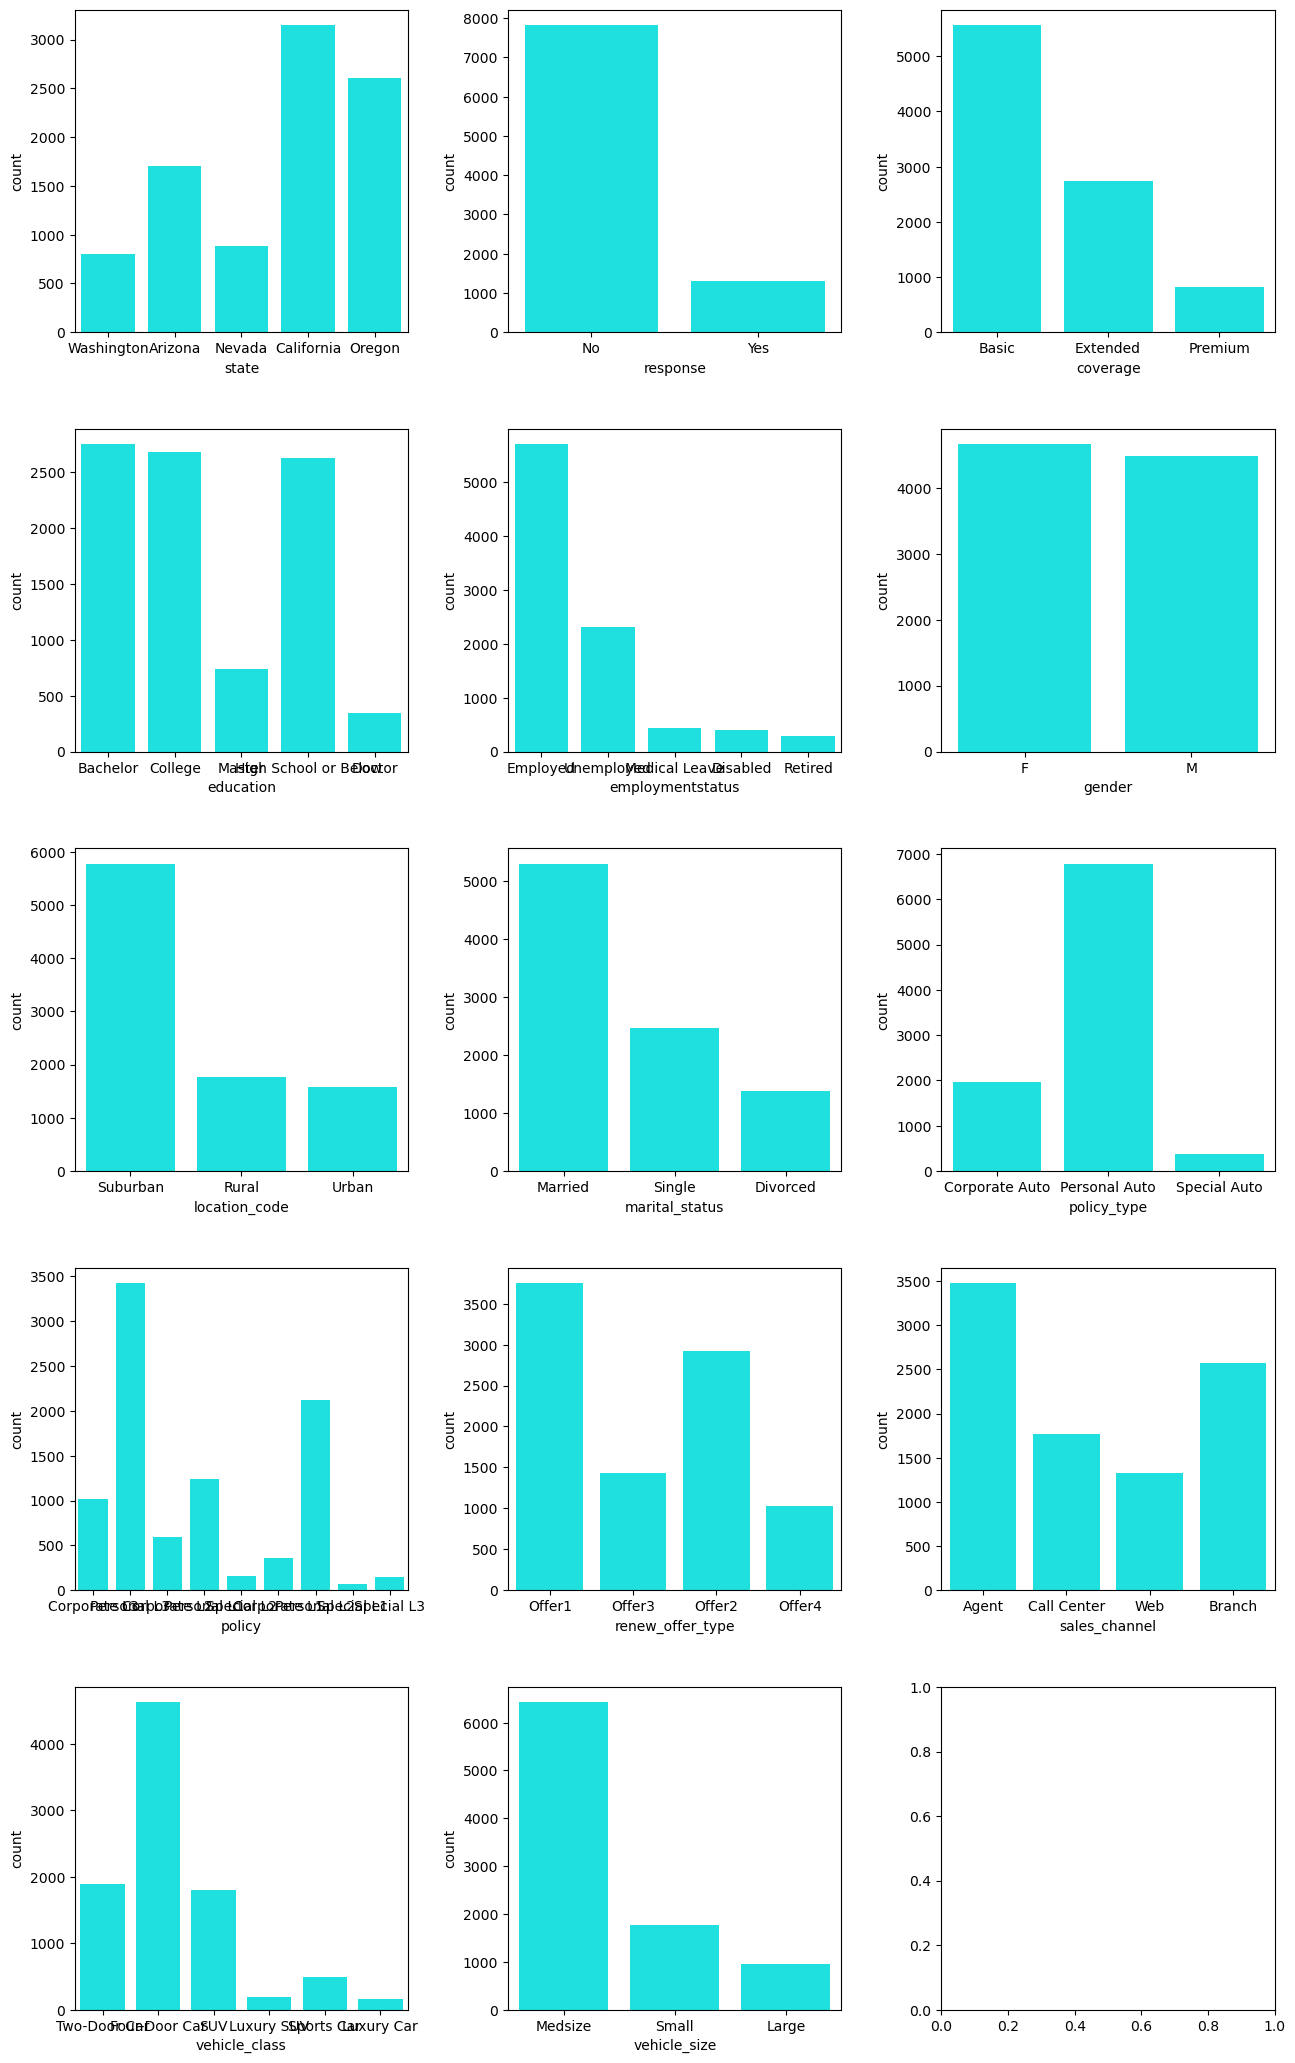

In [16]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(categorical_df.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(categorical_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.countplot(x=categorical_df[column], ax=axes[row_idx, col_idx], color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

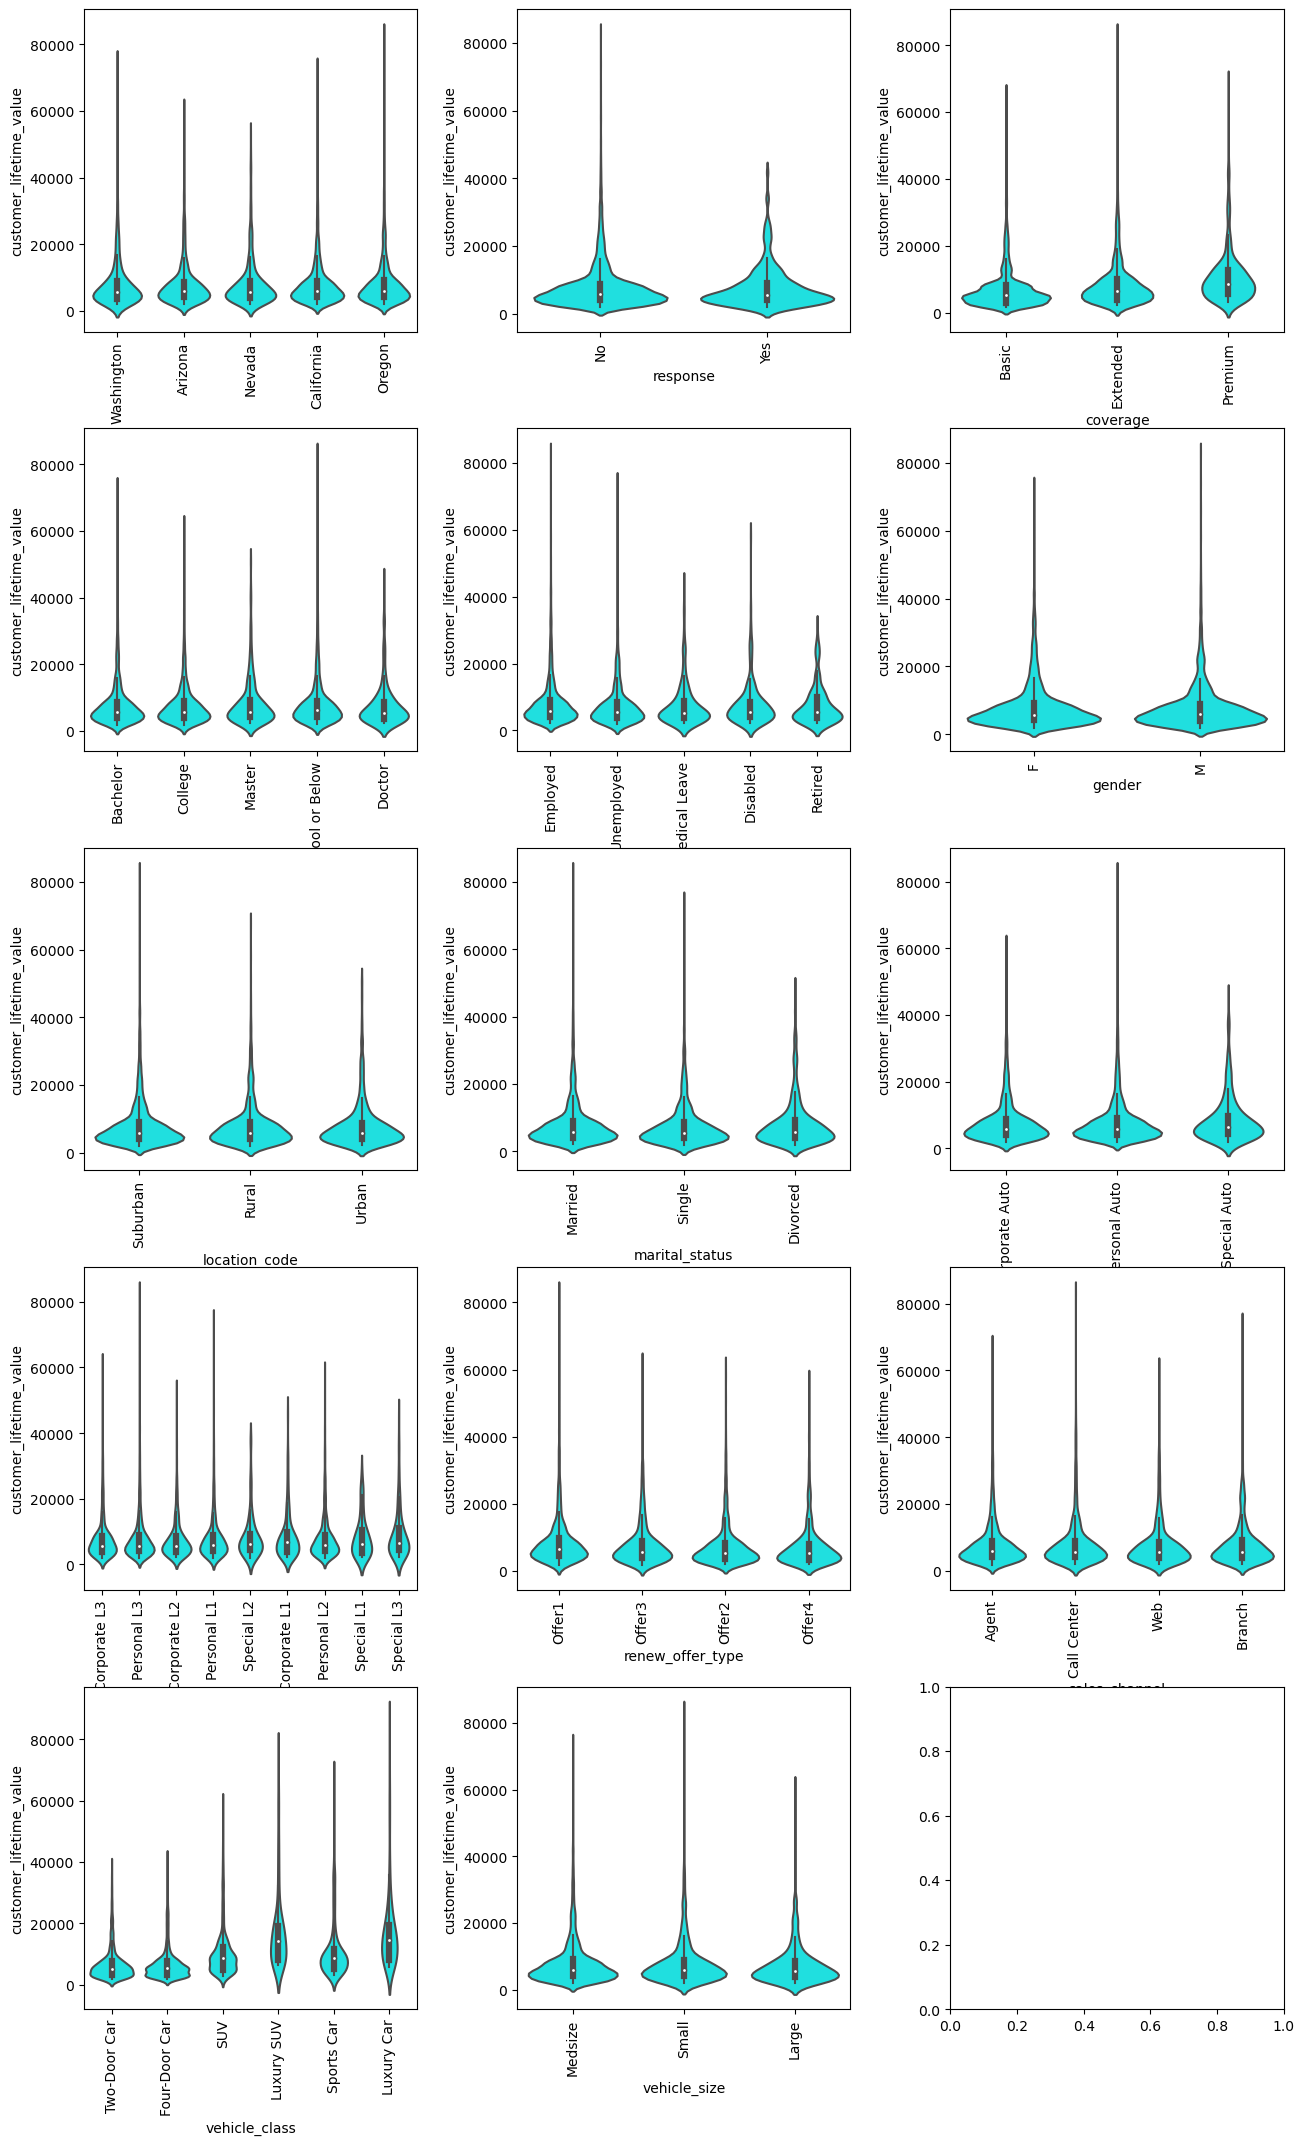

In [27]:
##Is customer_lifetime_value the target??
##violin plot
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(categorical_df.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(categorical_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.violinplot(x=categorical_df[column],y='customer_lifetime_value', ax=axes[row_idx, col_idx],data= customer_df, color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

## <span style="color:#7B241C"> 6</span>

In [31]:
#Check unique values for each categorical value
for column in categorical_df.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", categorical_df[column].nunique(), " categories \n The single values are: ", categorical_df[column].unique(),"\n" )
    print("Here the detail: \n" , categorical_df[column].value_counts())
    print("\n\n")

──────────
This feature  state  has  5  categories 
 The single values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Here the detail: 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64



──────────
This feature  response  has  2  categories 
 The single values are:  ['No' 'Yes'] 

Here the detail: 
 No     7826
Yes    1308
Name: response, dtype: int64



──────────
This feature  coverage  has  3  categories 
 The single values are:  ['Basic' 'Extended' 'Premium'] 

Here the detail: 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64



──────────
This feature  education  has  5  categories 
 The single values are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Here the detail: 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: in